In [210]:
# making Some essential imports
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt

In [217]:
# loading and checking data
dataFrame = pd.read_csv('instagram_reach.csv')

In [220]:
# removing hours and typecasting to int
dataFrame['Time since posted'] = dataFrame['Time since posted'].apply(lambda x: int(x.replace(" hours","")))
dataFrame.isna().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [216]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    int64 
 7   Likes              100 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


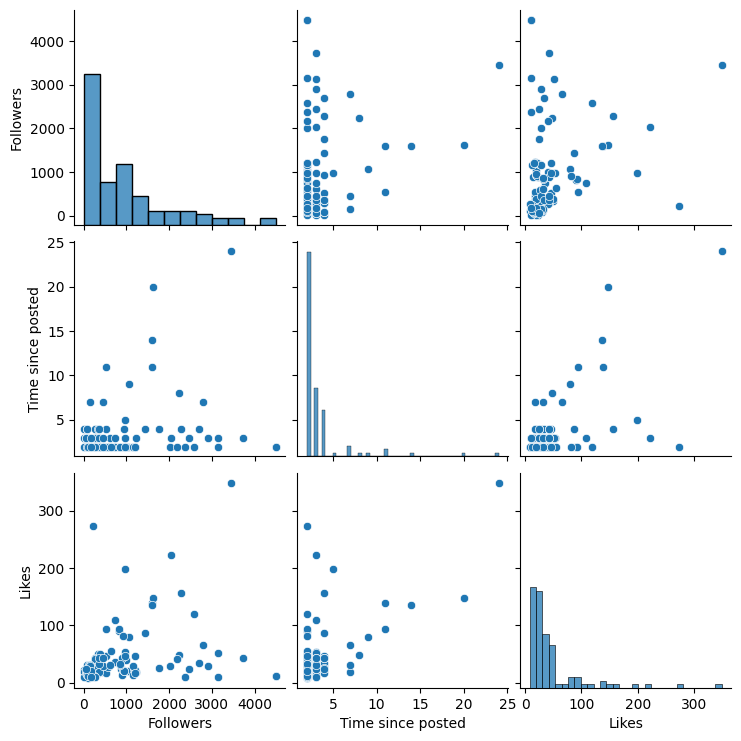

In [223]:
sns.pairplot(dataFrame[['Followers', 'Time since posted','Likes']])

In [231]:
featureVector = np.array(dataFrame[['Followers', 'Time since posted']], dtype = 'float32')
targets = np.array(dataFrame['Likes'], dtype = 'float32')
maxValLikes = max(targets)
#diving targets by max values
targets = targets/maxValLikes

In [225]:
# doing standard stuff now
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(featureVector, targets, test_size = 0.1, random_state = 42)

stdSc = StandardScaler()
xTrain = stdSc.fit_transform(xTrain)
xTest = stdSc.transform(xTest)

In [226]:
# for sake of conviniece 
# lets choose our model as 
# Gradeint Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(xTrain, yTrain)

GradientBoostingRegressor()

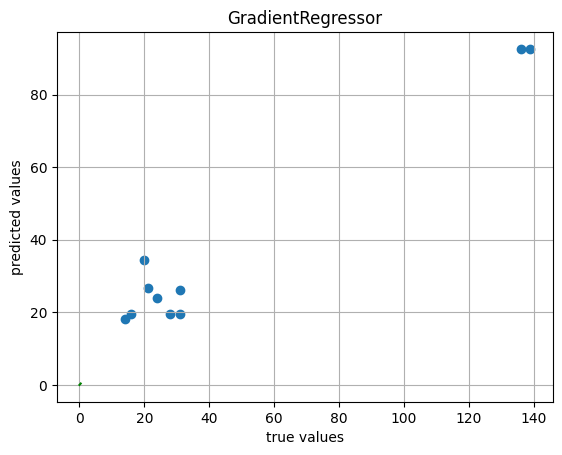

In [227]:
# doing Some Benchmarks
predictions = gbr.predict(xTest)
plt.scatter(yTest, predictions)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

From Benchmarks this seems the model though not perfect
is still workable. Lets do some Predictive modelling on the following cases:

Case 1.) You have 100 followers and time passes by one hour for 24 hours

case 2.) You have 100 followers and you Can 100 follower every hour for 24 hours

In [232]:
def PredictionsWithConstantFollowers(model, followerCount, scaller, maxVal):
    followers = followerCount * np.ones(24)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with ' + str(followerCount) +' followers')
    plt.show()

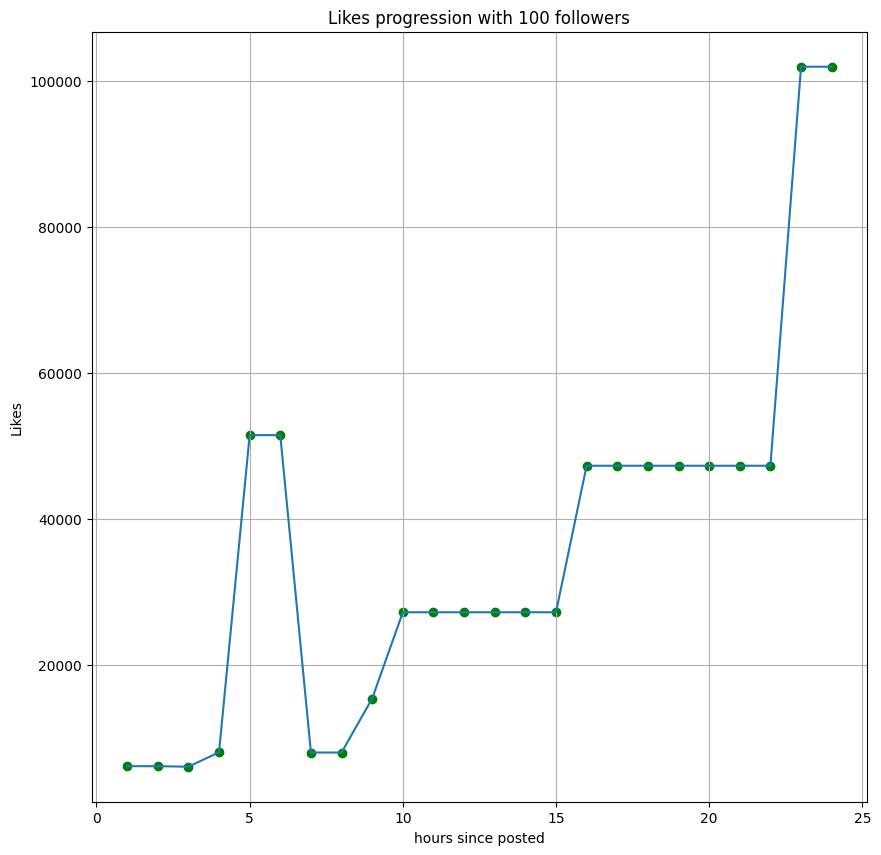

In [233]:
PredictionsWithConstantFollowers(gbr, 100, stdSc, maxValLikes)

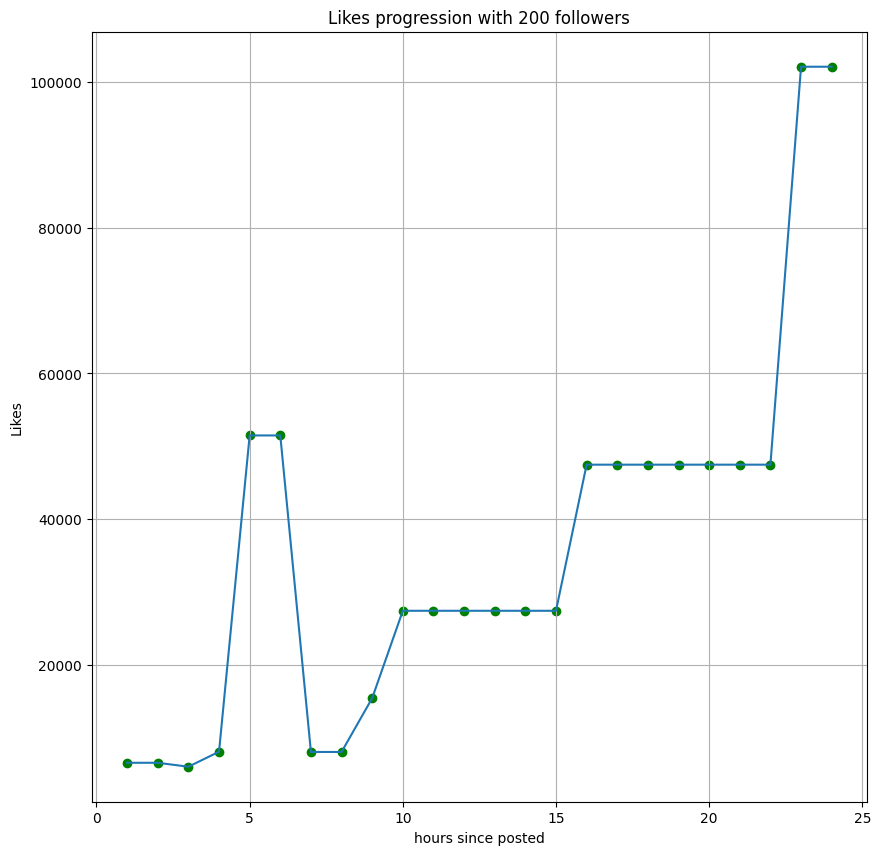

In [234]:
## let double the Number of Followers
PredictionsWithConstantFollowers(gbr, 200, stdSc, maxValLikes)

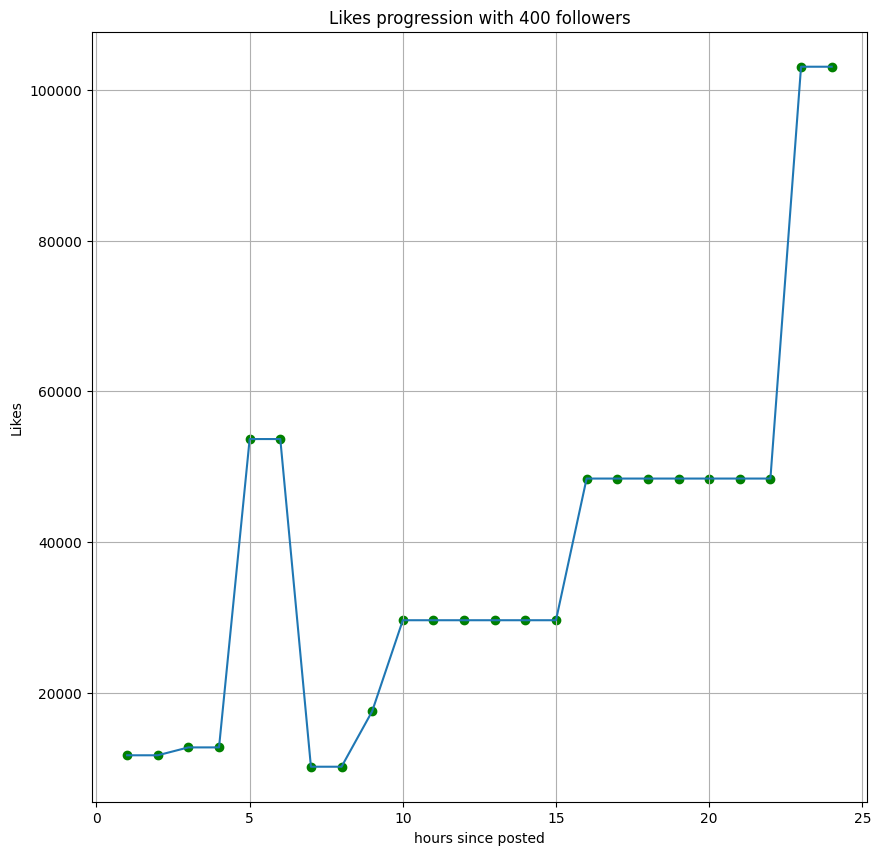

In [235]:
## let 4X the Number of Followers
PredictionsWithConstantFollowers(gbr, 400, stdSc, maxValLikes)

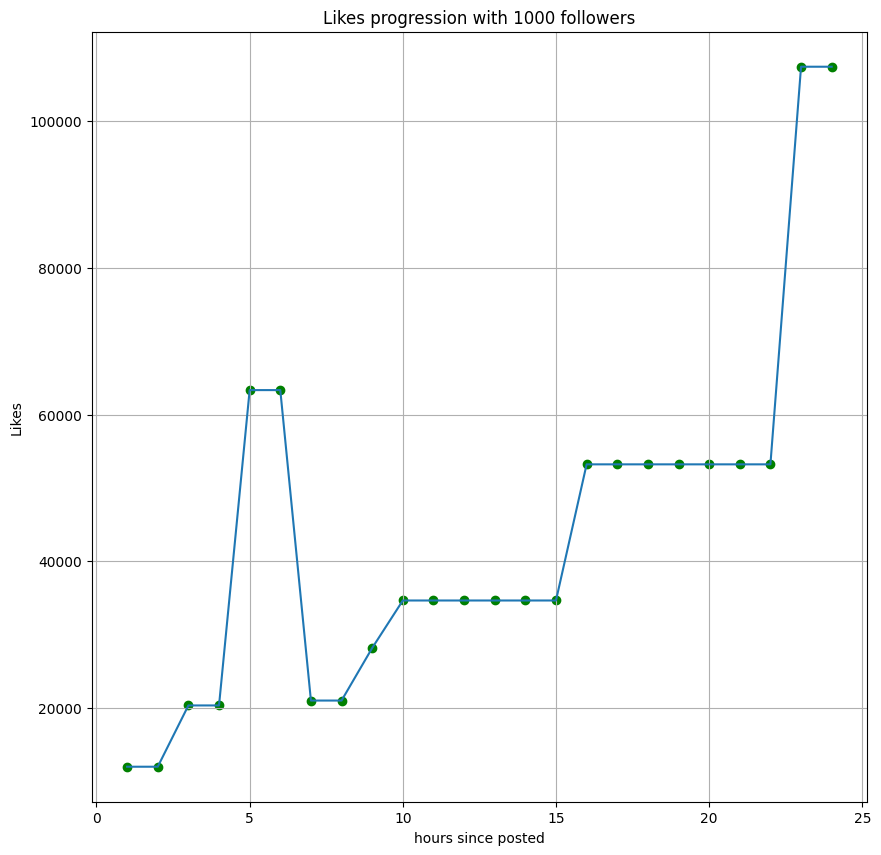

In [236]:
## let 10X the Number of Followers
PredictionsWithConstantFollowers(gbr, 1000, stdSc, maxValLikes)

According to this model we can infer one thing, that is, If you have higher number of followers your post will
gain more Likes early in its life time, but maximum likes doesnt increase that much, here 20X the number followers
yeild only about 20% increase in likes

In [237]:
def PredictionsWithVariableFollowers(model, followerCount, scaller, maxVal):
    followers = np.arange(100, 2500, 100)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with variable followers')
    plt.show()

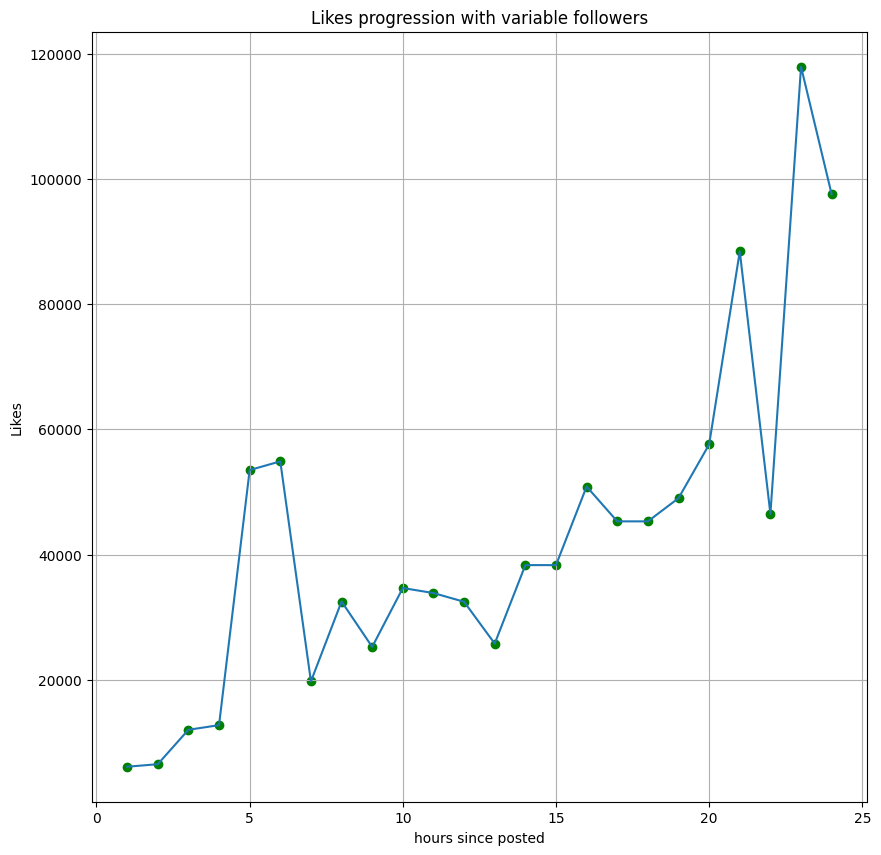

In [238]:
PredictionsWithVariableFollowers(gbr, 1000, stdSc, maxValLikes)

If our predictive model is right, and case 2 is true
then around 15 hours posts like will grow exponentially !! (In my opnion I dont believe so)


Thanks, If you have reached here and read the entire Notebook
Also, Todo In, future versions Replacing single GBR model with an
essembled model
